<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Financial_Data_from_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary Libraries

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 883 kB/s 
     |████████████████████████████████| 6.4 MB 12.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Importing the Datasets

In [ ]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
period = input('Enter the period (1y,2y,3y...max): ')
print(f'You entered {stock} and period {period}')

ticker = yf.Ticker(stock)

Enter the stock ticker: U
Enter the period (1y,2y,3y...max): max
You entered U and period max


In [ ]:
# get stock info
print(f'This is the info available from {stock}:\n')
print(ticker.info)

# get historical market data
print('\n This is the historical market data from the last 10 days:\n')
hist = ticker.history(period)
print(hist.tail(10))

# show actions (dividends, splits)
# ticker.actions

# show dividends if any
# ticker.dividends

# show splits if any
# ticker.splits

# show major holders
print('\n These are the Major holders:\n')
print(ticker.major_holders)

# show institutional holders
print('\n These are the institutional holders:\n')
print(ticker.institutional_holders)

# show earnings
print('\n These are the Annual Earnings:\n')
print(ticker.earnings)
print('\n These are the Quarterly Earnings:\n')
print(ticker.quarterly_earnings)

# show sustainability
print('\n This is the Reported Sustainability:\n')
print(ticker.sustainability)

# show analysts recommendations
# ticker.recommendations

# show next event (earnings, etc)
# ticker.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
print('\n ISIN:',ticker.isin)

# show options expirations
# ticker.options

# show news
# ticker.news

# get option chain for specific expiration
# opt = ticker.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

This is the info available from U:

{'zip': '94103-3104', 'sector': 'Technology', 'fullTimeEmployees': 5864, 'longBusinessSummary': 'Unity Software Inc. creates and operates an interactive real-time 3D content platform. Its platform provides software solutions to create, run, and monetize interactive, real-time 2D and 3D content for mobile phones, tablets, PCs, consoles, and augmented and virtual reality devices. The company serves content creators and developers, artists, designers, engineers, and architects to create interactive and real-time 2D and 3D content. It offers its solutions directly through its online store, field sales operations, independent distributors, and resellers in the United States, Denmark, Belgium, Canada, China, Colombia, Finland, France, Germany, Ireland, Israel, Japan, Lithuania, Portugal, Singapore, South Korea, Spain, Sweden, Switzerland, and the United Kingdom. The company was founded in 2004 and is headquartered in San Francisco, California.', 'city': 'S

In [ ]:
# show financials
print('\n These are the Annual Income Statements:\n')
print(ticker.financials)
print('\n These are the Quarterly Income Statements:\n')
print(ticker.quarterly_financials)

# show balance sheet
print('\n This is the Annual Balance Sheet:\n')
print(ticker.balance_sheet)
print('\n This is the Quarterly Balance Sheet:\n')
print(ticker.quarterly_balance_sheet)

# show cashflow
print('\n This is the Annual Cashflow:\n')
print(ticker.cashflow)
print('\n This is the Quarterly Cashflow:\n')
print(ticker.quarterly_cashflow)


 These are the Annual Income Statements:

                                          2021-12-31   2020-12-31  \
Research Development                     695710000.0  403515000.0   
Effect Of Accounting Charges                    None         None   
Income Before Tax                       -531230000.0 -280217000.0   
Minority Interest                               None         None   
Net Income                              -532607000.0 -282308000.0   
Selling General Administrative           629256000.0  403680000.0   
Gross Profit                             862330000.0  601215000.0   
Ebit                                    -468070000.0 -207097000.0   
Operating Income                        -468070000.0 -207097000.0   
Other Operating Expenses                   5434000.0    1117000.0   
Interest Expense                          -1131000.0   -1520000.0   
Extraordinary Items                             None         None   
Non Recurring                                   None        

In [ ]:
# Fill Empty/NA cells with zeros, transpose it and rename index
financials = ticker.financials.fillna(0).transpose()
financials.index.rename('Date', inplace=True)
financials = financials.assign(**{'symbol': stock})

balancesheet = ticker.balance_sheet.fillna(0).transpose()
balancesheet.index.rename('Date', inplace=True)
balancesheet = balancesheet.assign(**{'symbol': stock})

cashflow = ticker.cashflow.fillna(0).transpose()
cashflow.index.rename('Date', inplace=True)
cashflow = cashflow.assign(**{'symbol': stock})

info = pd.DataFrame.from_dict(ticker.info, orient ='index').transpose()
info.set_index('symbol', inplace=True)

In [ ]:
# Download Financial CSV Files
financials.to_csv(f'{stock}_income_statement.csv')
files.download(f'{stock}_income_statement.csv')
balancesheet.to_csv(f'{stock}_balance_sheet.csv')
files.download(f'{stock}_balance_sheet.csv')
cashflow.to_csv(f'{stock}_cashflow.csv')
files.download(f'{stock}_cashflow.csv')
info.to_csv(f'{stock}_info.csv')
files.download(f'{stock}_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Multiple Tickers Data Test
TickersData = yf.download(
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",
        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",
        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',
        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,
        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,
        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,
        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
TickersData.head()

[*********************100%***********************]  3 of 3 completed


SPY                                   MSFT  \
                             Open    High     Low   Close Volume    Open   
Datetime                                                                   
2022-06-09 04:00:00-04:00  411.44  411.50  411.10  411.10    0.0  270.00   
2022-06-09 04:01:00-04:00  411.19  411.28  411.19  411.28    0.0  269.80   
2022-06-09 04:02:00-04:00  411.19  411.34  411.19  411.34    0.0     NaN   
2022-06-09 04:03:00-04:00  411.20  411.20  411.04  411.04    0.0  270.12   
2022-06-09 04:04:00-04:00  411.18  411.18  411.18  411.18    0.0     NaN   

                                                            AAPL          \
                             High     Low   Close Volume    Open    High   
Datetime                                                                   
2022-06-09 04:00:00-04:00  270.47  270.00  270.05    0.0  147.86  147.86   
2022-06-09 04:01:00-04:00  269.80  269.80  269.80    0.0  147.64  147.80   
2022-06-09 04:02:00-04:00     NaN     NaN     NaN    NaN  147.75  147.75   
2022-06-09 04:03:00-04:00  270.12  269.56  269.56    0.0  147.75  147.76   
2022-06-09 04:04:00-04:00     NaN     NaN     NaN    NaN  147.67  147.68   

                                                  
                              Low   Close Volume  
Datetime                                          
2022-06-09 04:00:00-04:00  147.50  147.70    0.0  
2022-06-09 04:01:00-04:00  147.63  147.63    0.0  
2022-06-09 04:02:00-04:00  147.71  147.74    0.0  
2022-06-09 04:03:00-04:00  147.60  147.62    0.0  
2022-06-09 04:04:00-04:00  147.67  147.67    0.0

# Data Visualization (plotly express) - Visualizing the historical performance

In [ ]:
data = hist.reset_index()

In [ ]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [ ]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [ ]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [ ]:
# Hurst Exponent >0.5 expanding, 0.5 random walking, <0.5 mean reverting (Lags in Days)
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]
  
hurst = pd.DataFrame(columns =["hurst_exp","lag"])
lags = range(4, 121, 2)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst = hurst.append({"hurst_exp":hurst_exp,"lag":lag},ignore_index=True)
px.line(hurst, x="hurst_exp", y="lag", title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [ ]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
434,2022-06-09,41.299999
435,2022-06-10,36.900002
436,2022-06-13,34.349998
437,2022-06-14,33.759998
438,2022-06-15,36.169998


## Creating Facebook Prophet Model

In [ ]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
periods = 30
future=m.make_future_dataframe(periods)

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-18,67.296011,61.437155,89.248762,67.296011,67.296011,7.967321,7.967321,7.967321,0.109389,0.109389,0.109389,7.857932,7.857932,7.857932,0.0,0.0,0.0,75.263332
1,2020-09-21,68.632172,62.575138,88.779143,68.632172,68.632172,7.677517,7.677517,7.677517,-0.478882,-0.478882,-0.478882,8.156398,8.156398,8.156398,0.0,0.0,0.0,76.309688
2,2020-09-22,69.077559,64.163090,90.532658,69.077559,69.077559,8.359050,8.359050,8.359050,0.112899,0.112899,0.112899,8.246150,8.246150,8.246150,0.0,0.0,0.0,77.436608
3,2020-09-23,69.522945,64.069378,90.990492,69.522945,69.522945,7.959750,7.959750,7.959750,-0.378593,-0.378593,-0.378593,8.338343,8.338343,8.338343,0.0,0.0,0.0,77.482696
4,2020-09-24,69.968332,63.675652,93.045100,69.968332,69.968332,8.330185,8.330185,8.330185,-0.106721,-0.106721,-0.106721,8.436907,8.436907,8.436907,0.0,0.0,0.0,78.298518
5,2020-09-25,70.413719,64.612796,91.262069,70.413719,70.413719,8.654682,8.654682,8.654682,0.109389,0.109389,0.109389,8.545293,8.545293,8.545293,0.0,0.0,0.0,79.068402
6,2020-09-28,71.749880,67.060687,94.727358,71.749880,71.749880,8.475824,8.475824,8.475824,-0.478882,-0.478882,-0.478882,8.954706,8.954706,8.954706,0.0,0.0,0.0,80.225704
7,2020-09-29,72.195266,67.860175,94.959296,72.195266,72.195266,9.237092,9.237092,9.237092,0.112899,0.112899,0.112899,9.124192,9.124192,9.124192,0.0,0.0,0.0,81.432358
8,2020-09-30,72.640653,67.997789,94.594960,72.640653,72.640653,8.932211,8.932211,8.932211,-0.378593,-0.378593,-0.378593,9.310804,9.310804,9.310804,0.0,0.0,0.0,81.572864
9,2020-10-01,73.086040,69.522604,95.971532,73.086040,73.086040,9.407108,9.407108,9.407108,-0.106721,-0.106721,-0.106721,9.513829,9.513829,9.513829,0.0,0.0,0.0,82.493148


In [ ]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

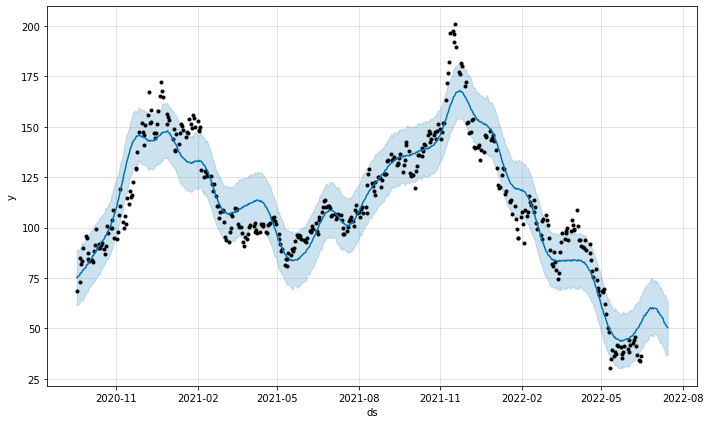

In [ ]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

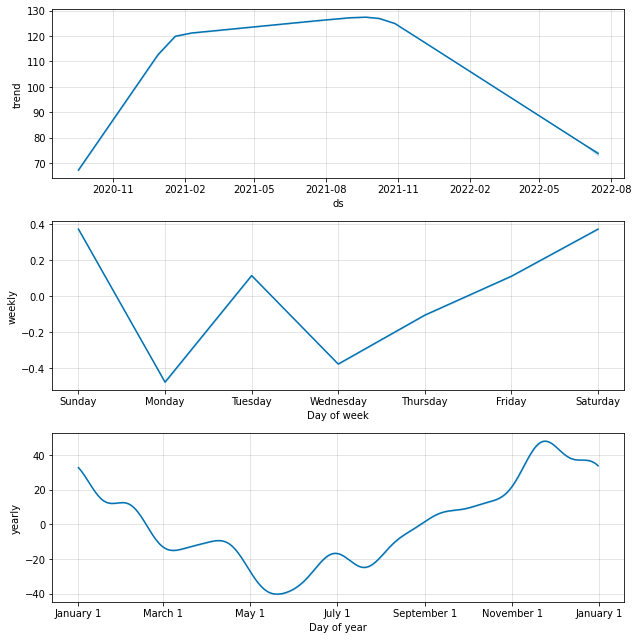

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>